In [ ]:
### Import & setup
import sys
sys.path.append('C:\\Users\\szb37\\My Drive\\Projects\\ADAPT\\ADAPT codebase\\')
import src.folders as folders
import src.power as power
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['figure.dpi'] = 300  # Set display DPI
plt.style.use('seaborn-v0_8-notebook')  # notebook-optimized

prefix = 'mock'
n_trials = 500
sample = 300
samples = np.arange(20, 110, 10).tolist() + np.arange(120, 320, 20).tolist()

def save_fig(fig, fname):
    for format in ['png', 'svg']:
        fig.savefig(
            fname=os.path.join(folders.powerplots, f'{fname}.{format}'),
            bbox_inches='tight',
            format=format,
            dpi=300,)

# Efficacy power

In [ ]:
### Generate mock data & calc CIs & significance for efficacy power

# Define scenarios
scenario_params = []
for smd in np.arange(0, 1.2, 0.3):
    smd = round(smd, 1)
    scenario_params.append(
        (f'SMD {smd}', 
        {'type': 'normal',
            'arm_params':{
                'C': {'mean': 1, 'sd': 1,},
                'T': {'mean': 1+smd, 'sd': 1,},                
            },}))

# Get trials data for each scenario
df_patientsData=[]
for scenario_param in scenario_params:
    df_patientsData.append(
            power.DataGeneration.get_df_patientsData(
            scenario = scenario_param[0], 
            n_trials = n_trials, 
            sample = sample, 
            params = [scenario_param[1]]))
           
df_patientsData = pd.concat(df_patientsData, ignore_index=True)
df_patientsData.head()

# Calculate CIs
df_CIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData, 
    samples = samples)
# Add significance
df_CIs = df_CIs.rename(columns={
    'ciL': 'gmg_ciL',    
    'ciH': 'gmg_ciH', 
    'moe': 'gmg_moe',})    

df_CIs = power.Stats.add_sd(df_CIs)
df_CIs.head(3)

In [ ]:
### Efficacy power plot
fig, ax = plt.subplots()
sns.lineplot(
    data = df_CIs,
    x = 'sample', 
    y = 'gmg_sd',
    hue = 'scenario',
)

plt.title('Efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'}, 
    loc='lower right',)

save_fig(fig, 'power_effiacy_theory')
plt.show()

# Unmasking power - GMG

In [ ]:
### Generate mock data & calc CIs & significance for unmasking power with GMG blinding metric

# Define scenarios 
scenario_params = []
sd = 7.6 # This the average SD in POP data
for diff in np.arange(0, 6, 1.5):
    diff = round(diff, 1)
    scenario_params.append(
        (f'Δ guess {diff}mg', 
        {'type': 'normal',
            'arm_params':{
                'C': {'mean':      10, 'sd': sd,},
                'T': {'mean': 10+diff, 'sd': sd,},                
            },}))

# Get trials data for each scenario
df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]

    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)     
           
df_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate CIs
df_CIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData, 
    samples = samples)
### Renaming columns 
df_CIs = df_CIs.rename(columns={
    'ciL': 'gmg_ciL',    
    'ciH': 'gmg_ciH', 
    'moe': 'gmg_moe',})    
df_CIs = power.Stats.add_sd(df_CIs)
df_CIs.head(3)

In [ ]:
### Unmasking power plot (GMG)
fig, ax = plt.subplots()
sns.lineplot(
    data = df_CIs,
    x = 'sample', 
    y = 'gmg_sd',
    hue = 'scenario',
)

plt.title('Unmasking power - guessed mg', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant unmasking', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='upper left')

plt.show()
save_fig(fig, 'power_unmasking_gmg_theory')

# Unmasking power - CGR

In [ ]:
### Generate mock data & calc CIs, significance for unmasking power with CGR

# Define scenarios
scenario_params = []
for cgr in np.arange(0.5, 0.7, 0.05):
    cgr = round(cgr, 2)
    scenario_params.append(
        (f'CGR {cgr}', 
        {'type': 'binaryguess',
            'arm_params':{
                'C': {'cgr': cgr},
                'T': {'cgr': cgr},                
            },}))

### Get trials data for each scenario
df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]

    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)     
           
df_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate CIs
df_CIs = power.Stats.get_df_cgrCIs_vector(
    df_patientsData, 
    samples = samples)

### Renaming columns 
df_CIs = df_CIs.rename(columns={
    'ciL': 'cgr_ciL',    
    'ciH': 'cgr_ciH', 
    'moe': 'cgr_moe',})    
df_CIs = power.Stats.add_sd(df_CIs)
df_CIs.head(3)

In [ ]:
### Unmasking power plot (CGR)
fig, ax = plt.subplots()
sns.lineplot(
    data = df_CIs,
    x = 'sample', 
    y = 'cgr_sd',
    hue = 'scenario',
)

plt.title('Unmasking power - CGR', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant unmasking', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},)

save_fig(fig, 'power_unmasking_cgr_theory')
plt.show()

# Mixed power plots - showing both efficacy & unmasking power

In [ ]:
### Generate OUTCOME mock data & calc CIs, significance
scenario_params = []
for smd in [0.6]:
    smd = round(smd, 1)
    scenario_params.append(
        (f'SMD {smd}', 
        {'type': 'normal',
            'arm_params':{
                'C': {'mean': 1, 'sd': 1,},
                'T': {'mean': 1+smd, 'sd': 1,},                
},}))

df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]

    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)     
           
df_outcome_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate OUTCOME CIs
df_diffCIs = power.Stats.get_df_diffCIs_vector(
    df_outcome_patientsData, 
    samples = samples)
df_diffCIs = df_diffCIs.rename(columns={
    'ciL': 'gmg_ciL',    
    'ciH': 'gmg_ciH', 
    'moe': 'gmg_moe',})    
df_diffCIs = power.Stats.add_sd(df_diffCIs)

## CGR

In [ ]:
### Generate CGR mock data & calc CIs, significance
scenario_params = []
for cgr in np.arange(0.54, 0.58, 0.01):
    cgr = round(cgr, 3)
    scenario_params.append(
        (f'CGR {cgr}', 
        {'type': 'binaryguess',
            'arm_params':{
                'C': {'cgr': cgr},
                'T': {'cgr': cgr},                
            },}))
df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]

    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)     
           
df_cgr_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate CGR CIs
df_cgrCIs = power.Stats.get_df_cgrCIs_vector(
    df_cgr_patientsData, 
    samples = samples)
df_cgrCIs = df_cgrCIs.rename(columns={
    'ciL': 'cgr_ciL',    
    'ciH': 'cgr_ciH', 
    'moe': 'cgr_moe',})    
df_cgrCIs = power.Stats.add_sd(df_cgrCIs)

In [ ]:
### Unmasking & efficacy power plot (CGR)
fig, ax = plt.subplots()

sns.lineplot(
    data = df_diffCIs[df_diffCIs.scenario=='SMD 0.6'],
    x = 'sample', 
    y = 'gmg_sd',
    linestyle = '--',
    color='black',
    label='SMD 0.6',
)

sns.lineplot(
    data = df_cgrCIs,
    x = 'sample', 
    y = 'cgr_sd',
    hue = 'scenario',
    linestyle = '-',
)

plt.title('Unmasking & efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect / unmasking', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},)

save_fig(fig, 'power_mixed_cgr_theory')
plt.show()

## GMG

In [ ]:
### Generate GMG mock data & calc CIs & significance

# Define scenarios 
scenario_params = []
sd = 7.6 # This the average SD in POP data
for diff in np.arange(0.5, 2.5, 0.5):
    diff = round(diff, 1)
    scenario_params.append(
        (f'Δ guess {diff}mg', 
        {'type': 'normal',
            'arm_params':{
                'C': {'mean':      10, 'sd': sd,},
                'T': {'mean': 10+diff, 'sd': sd,},                
            },}))

# Get trials data for each scenario
df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]

    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)     
           
df_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate CIs
df_gmgCIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData, 
    samples = samples)
### Renaming columns 
df_gmgCIs = df_gmgCIs.rename(columns={
    'ciL': 'gmg_ciL',    
    'ciH': 'gmg_ciH', 
    'moe': 'gmg_moe',})    
df_gmgCIs = power.Stats.add_sd(df_gmgCIs)
df_gmgCIs.head(3)

In [ ]:
### Unmasking & efficacy power plot (GMG)
fig, ax = plt.subplots()

sns.lineplot(
    data = df_diffCIs[df_diffCIs.scenario=='SMD 0.6'],
    x = 'sample', 
    y = 'gmg_sd',
    linestyle = '--',
    color='black',
    label='SMD 0.6',
)

sns.lineplot(
    data = df_gmgCIs,
    x = 'sample', 
    y = 'gmg_sd',
    hue = 'scenario',
    linestyle = '-',
)

plt.title('Unmasking & efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect / unmasking', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='upper right')

save_fig(fig, 'power_mixed_gmg_theory')
plt.show()

# Truncated CGR plot

In [ ]:
### Generate CGR mock data & calc CIs, significance
prefix = 'mock'
n_trials = 500
sample = 1000
samples = np.arange(30, 110, 10).tolist() + np.arange(120, 1020, 40).tolist() #+ np.arange(120, 320, 20).tolist()

scenario_params = []
for cgr in np.arange(0.52, 0.6, 0.02):
    cgr = round(cgr, 3)
    scenario_params.append(
        (f'CGR {cgr}', 
        {'type': 'binaryguess',
            'arm_params':{
                'C': {'cgr': cgr},
                'T': {'cgr': cgr},                
            },}))
df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]

    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)     
           
df_cgr_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate CGR CIs
df_cgrCIs = power.Stats.get_df_cgrCIs_vector(
    df_cgr_patientsData, 
    samples = samples)

pos = df_cgrCIs.columns.get_loc('cgr_moe') + 1
df_cgrCIs.insert(pos, 'cgr_sd', None) 
df_cgrCIs['cgr_sd'] = (
    (df_cgrCIs['cgr_ciL'] >= 0.5) | (df_cgrCIs['cgr_ciH'] <= 0.5))

pos = df_cgrCIs.columns.get_loc('cgr_moe') + 1
df_cgrCIs.insert(pos, 'cgr_trun', None) 
df_cgrCIs['cgr_trun'] = (
    ((df_cgrCIs['cgr_ciL'] >= 0.5) | (df_cgrCIs['cgr_ciH'] <= 0.5)) & (df_cgrCIs['cgr'] > 0.55))
    
df_cgrCIs.head()    

In [ ]:
### Unmasking power plot (GMG)
fig, ax = plt.subplots()
sns.lineplot(
    data = df_cgrCIs,
    x = 'sample', 
    y = 'cgr_sd',
    hue = 'scenario',
)

sns.lineplot(
    data = df_cgrCIs,
    x = 'sample', 
    y = 'cgr_trun',
    hue = 'scenario',
    linestyle = '--',
    legend = False,
)

plt.title('Unmasking power - truncated CGR', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant unmasking', fontweight='bold')
ax.set_xlim([df_cgrCIs['sample'].min(), df_cgrCIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='upper left')

plt.show()
save_fig(fig, 'power_unmasking_cgr_trunacted_theory')

# Real life mixed plot

In [4]:
### Generate OUTCOME mock data & calc CIs, significance
scenario_params = []
scenario_params.append(
    ('Goodwin SMD 0.8', 
    {'type': 'normal',
        'arm_params':{
            'C': {'mean': 1, 'sd': 1,},
            'T': {'mean': 1.8, 'sd': 1,},},}))
scenario_params.append(
    ('Raison SMD 1.2', 
    {'type': 'normal',
        'arm_params':{
            'C': {'mean': 1, 'sd': 1,},
            'T': {'mean': 2.2, 'sd': 1,},},}))
scenario_params.append(
    ('Carhart-H. SMD 1.3', 
    {'type': 'normal',
        'arm_params':{
            'C': {'mean': 1, 'sd': 1,},
            'T': {'mean': 2.3, 'sd': 1,},},}))

df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]
    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)                
df_outcome_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate OUTCOME CIs
df_diffCIs = power.Stats.get_df_diffCIs_vector(
    df_outcome_patientsData, 
    samples = samples)
df_diffCIs = df_diffCIs.rename(columns={
    'ciL': 'gmg_ciL',    
    'ciH': 'gmg_ciH', 
    'moe': 'gmg_moe',})    
df_diffCIs = power.Stats.add_sd(df_diffCIs)

In [ ]:
### Generate CGR mock data & calc CIs, significance
scenario_params = []
# scenario_params.append(
#     ('Holze 2023 (CGR:0.99)', 
#     {'type': 'binaryguess',
#         'arm_params':{
#             'C': {'cgr': 0.99},
#             'T': {'cgr': 0.99},                
#         },}))
scenario_params.append(
    ('Bogenschutz 2023 (CGR:0.94)', 
    {'type': 'binaryguess',
        'arm_params':{
            'C': {'cgr': 0.94},
            'T': {'cgr': 0.94},                
        },}))
scenario_params.append(
    ('POP (CGR:0.83)', 
    {'type': 'binaryguess',
        'arm_params':{
            'C': {'cgr': 0.83},
            'T': {'cgr': 0.83},                
        },}))

df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]
    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)             
df_cgr_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate CGR CIs
df_cgrCIs = power.Stats.get_df_cgrCIs_vector(
    df_cgr_patientsData, 
    samples = samples)
df_cgrCIs = df_cgrCIs.rename(columns={
    'ciL': 'cgr_ciL',    
    'ciH': 'cgr_ciH', 
    'moe': 'cgr_moe',})    
df_cgrCIs = power.Stats.add_sd(df_cgrCIs)

In [ ]:
### Unmasking (CGR) & efficacy power plot 
fig, ax = plt.subplots()
sns.lineplot(
    data = df_diffCIs,
    x = 'sample', 
    y = 'gmg_sd',
    hue = 'scenario',
    linestyle = '--',)

sns.lineplot(
    data = df_cgrCIs,
    x = 'sample', 
    y = 'cgr_sd',
    palette = ['red', 'black'],
    hue = 'scenario',)

plt.title('Unmasking & efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect / unmasking', fontweight='bold')
ax.set_xlim([df_diffCIs['sample'].min(), 100]) # df_diffCIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='lower right')

save_fig(fig, 'power_mixed_studies')
plt.show()

In [ ]:
### Generate GMG mock data for POP & calc CIs, significance
scenario_params = []
scenario_params.append(
    ('POP (Δ guess 13mg)', 
    {'type': 'normal',
        'arm_params':{
            'C': {'mean':      5, 'sd': 4,},
            'T': {'mean': 18, 'sd': 10,},                
        },}))

df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]
    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)                
df_outcome_patientsData = pd.concat(df_patientsData, ignore_index=True)

### Calculate OUTCOME CIs
df_popCIs = power.Stats.get_df_diffCIs_vector(
    df_outcome_patientsData, 
    samples = samples)
df_popCIs = df_popCIs.rename(columns={
    'ciL': 'gmg_ciL',    
    'ciH': 'gmg_ciH', 
    'moe': 'gmg_moe',})    
df_popCIs = power.Stats.add_sd(df_popCIs)

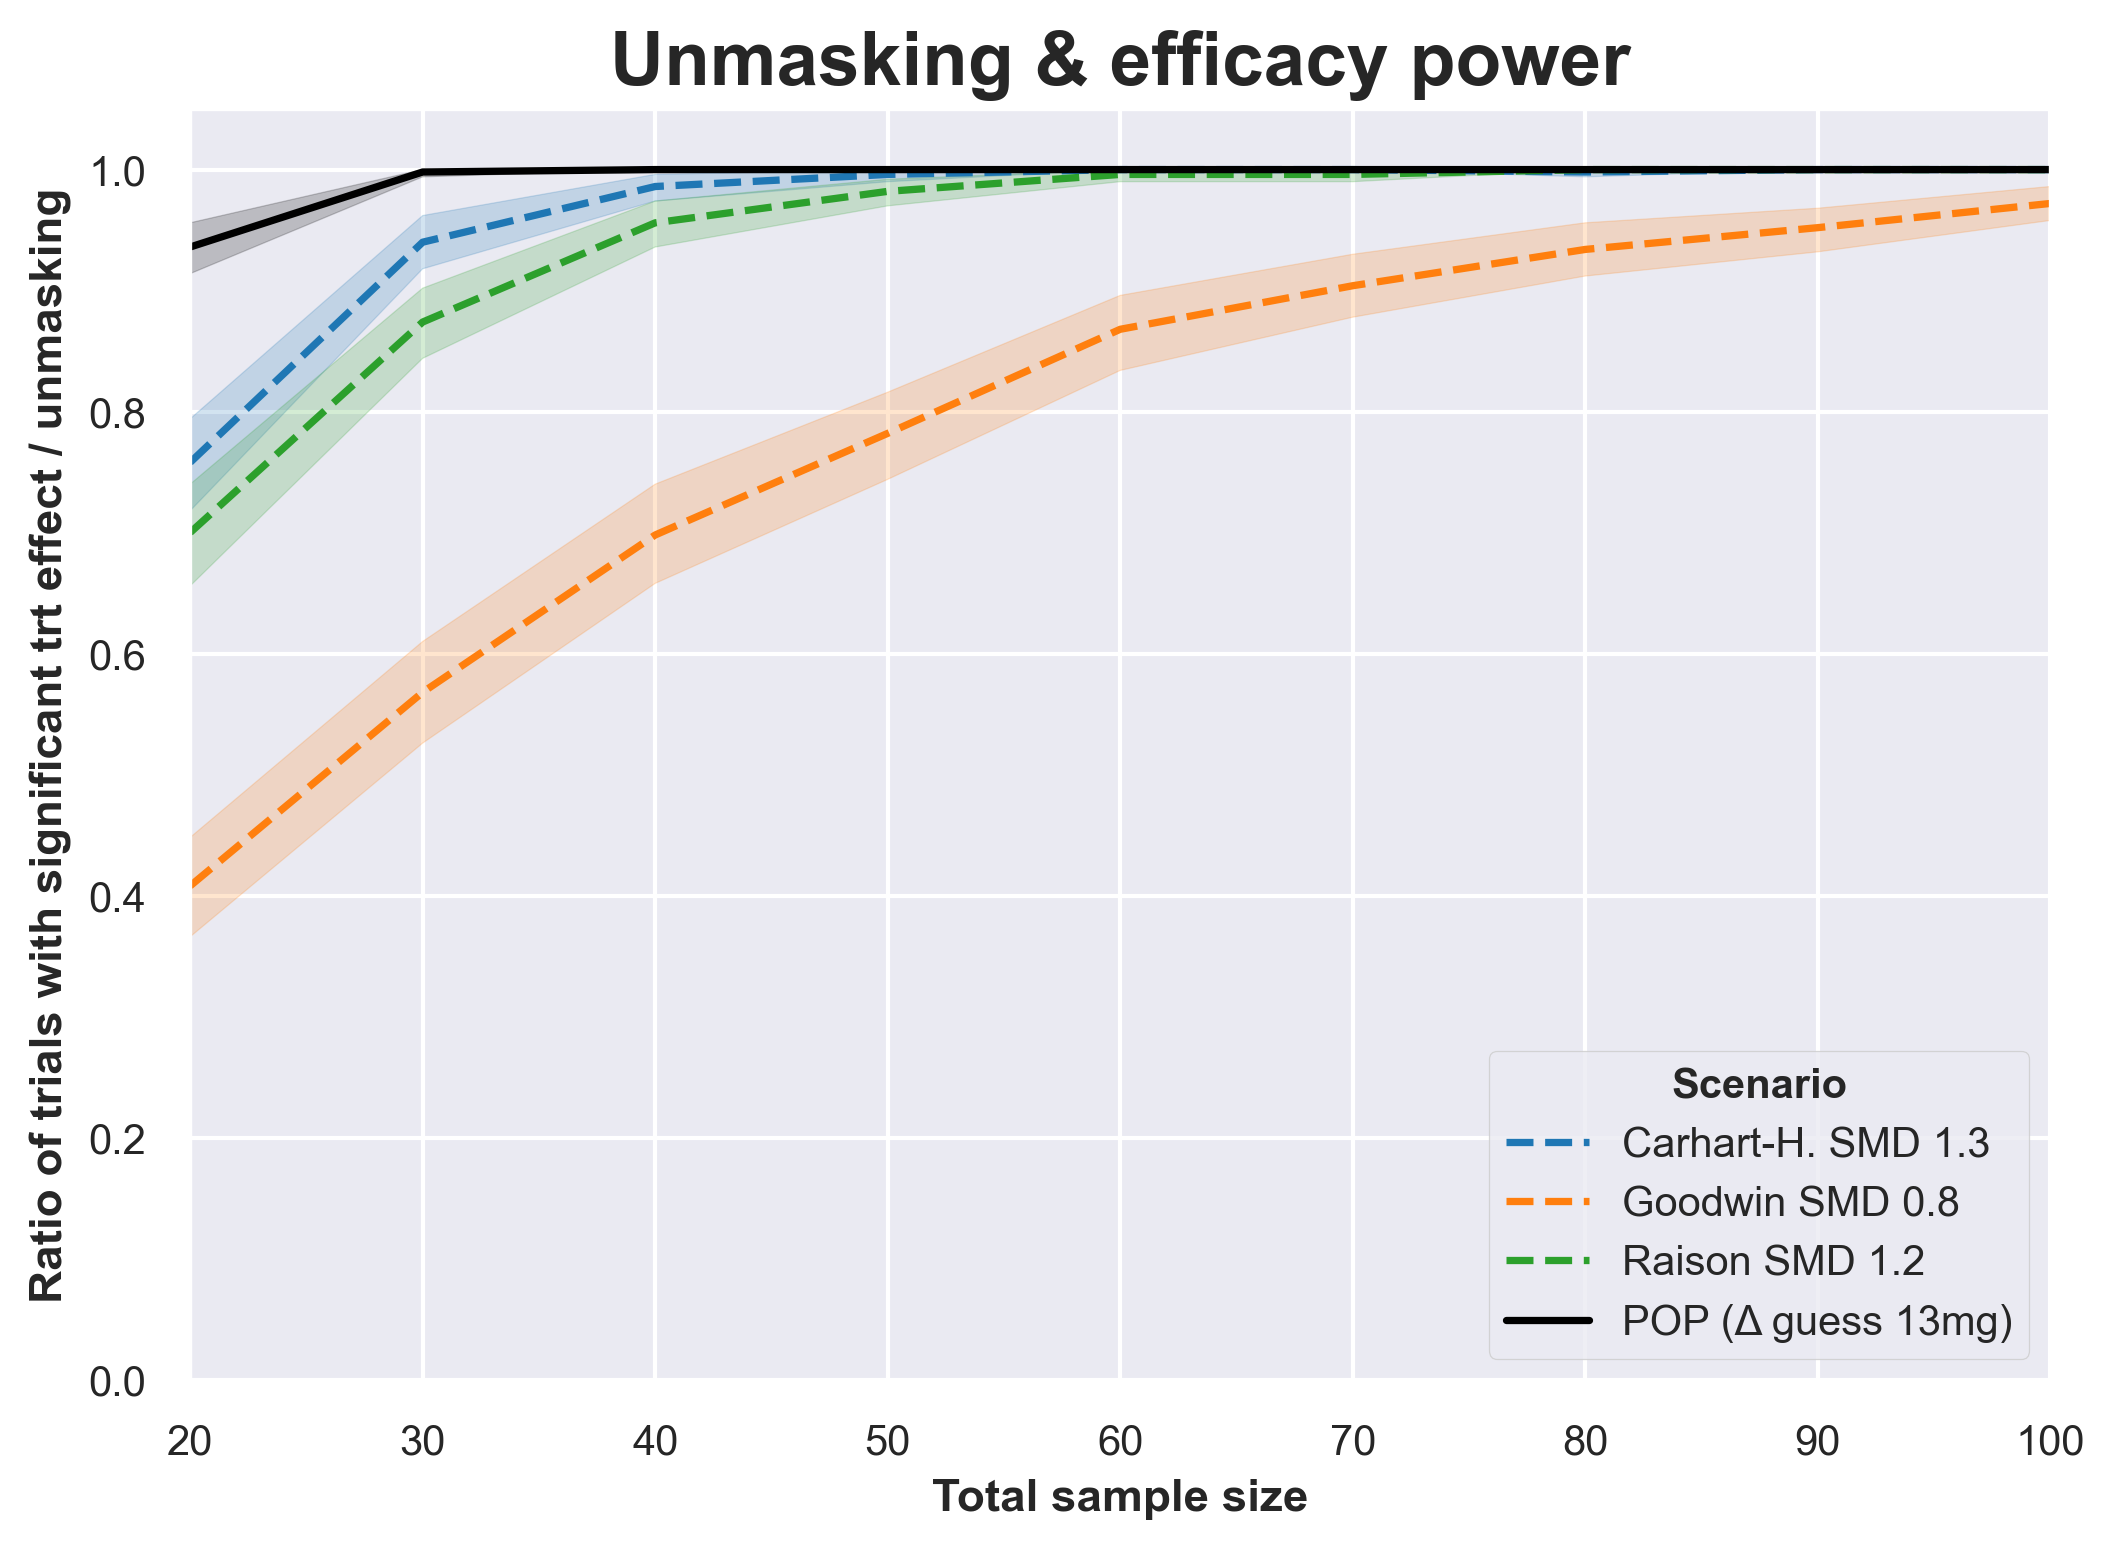

In [ ]:
### Unmasking (GMG) & efficacy power plot
fig, ax = plt.subplots()
sns.lineplot(
    data = df_diffCIs,
    x = 'sample', 
    y = 'gmg_sd',
    hue = 'scenario',
    linestyle = '--',)

sns.lineplot(
    data = df_popCIs,
    x = 'sample', 
    y = 'gmg_sd',
    palette = ['black'],
    hue = 'scenario',)

plt.title('Unmasking & efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with significant trt effect / unmasking', fontweight='bold')
ax.set_xlim([df_diffCIs['sample'].min(), 100]) # df_diffCIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'},
    loc='lower right')

save_fig(fig, 'power_mixed_studies_gmg')
plt.show()